## 📂 Importing Required Libraries

In [68]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [69]:
# Global Plot Theme
sns.set_theme(style="whitegrid", palette="deep")
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12


## 📊 Loading the Dataset

In [70]:
df = pd.read_csv('IPL.csv')
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


In [71]:
print("Shape of Dataset:", df.shape)
df.info()

Shape of Dataset: (74, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null

## 🧹 Data Cleaning

In this step:
- Checking missing values
- Removing duplicates
- Handling null values
- Standardizing column names


In [72]:
# Check missing values
df.isnull().sum()

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Standardize column names
df.columns = df.columns.str.lower().str.strip()

# Handle important null values
df = df.dropna(subset=['match_winner'])


print("Cleaned Data Shape:", df.shape)

Cleaned Data Shape: (74, 20)


In [73]:
matches_per_season = (
    pd.to_datetime(
        df['date'],
        format="%B %d,%Y",   # Matches "March 26,2022"
        errors='coerce'      # Invalid dates → NaT (safe)
    )
    .dt.year
    .value_counts()
    .sort_index()
)

print(matches_per_season)

date
2022.0    73
Name: count, dtype: int64


## 🏆 Most Successful Teams
Analyzing which teams have won the highest number of matches.

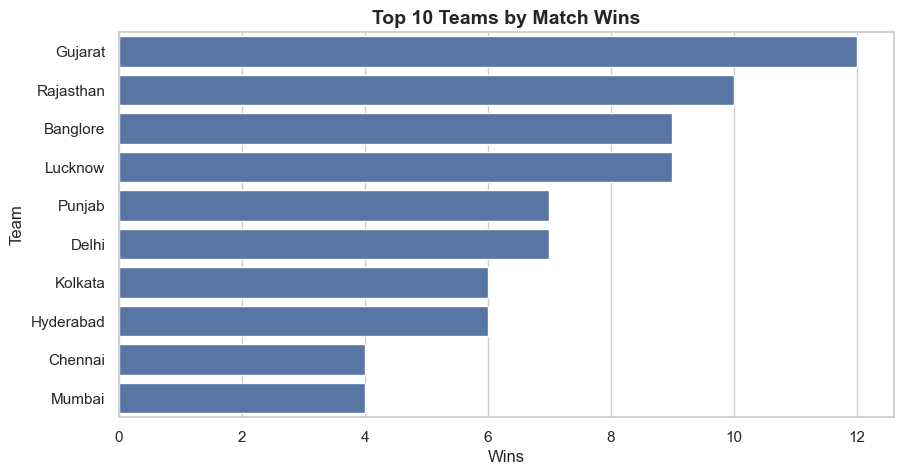

In [74]:
most_wins = df['match_winner'].value_counts().head(10)
most_wins
sns.barplot(x=most_wins.values, y=most_wins.index)
plt.title("Top 10 Teams by Match Wins")
plt.xlabel("Wins")
plt.ylabel("Team")
plt.show()


## 🎯 Toss Impact on Match Outcome
Checking whether winning the toss increases chances of winning the match.

Win percentage after toss: 48.65 %


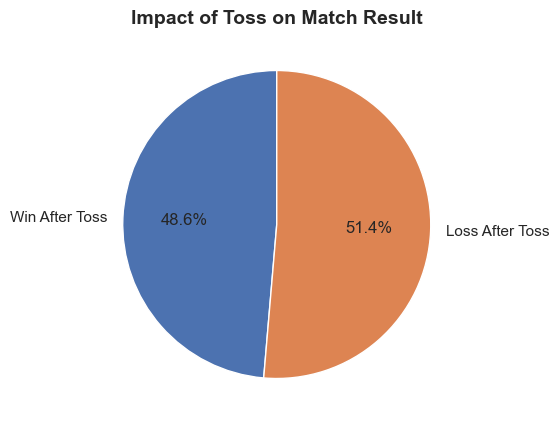

In [75]:
toss_win = df[df['toss_winner'] == df['match_winner']].shape[0]
total_matches = df.shape[0]

percentage = (toss_win / total_matches) * 100
print("Win percentage after toss:", round(percentage,2), "%")

labels = ['Win After Toss', 'Loss After Toss']
values = [toss_win, total_matches - toss_win]

plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Impact of Toss on Match Result")
plt.show()


## 🌟 Top Performing Players

Identifying players with highest Player of the Match awards.


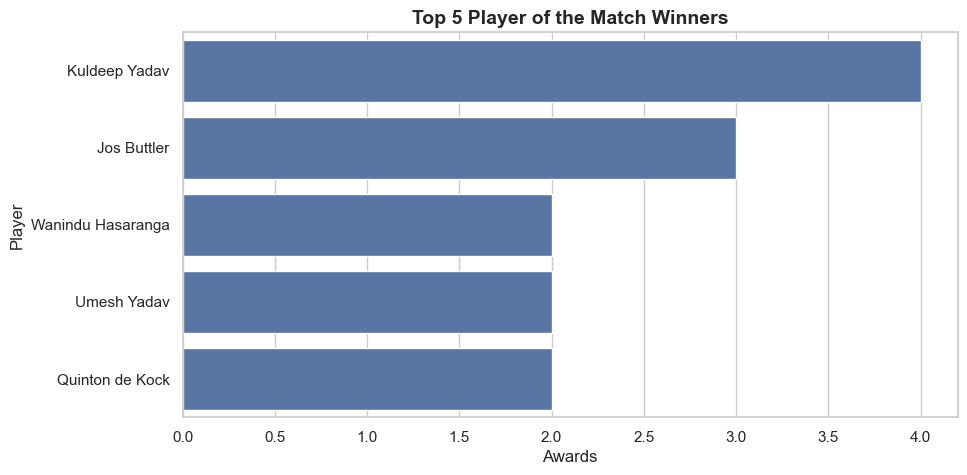

In [76]:
top_players = df['player_of_the_match'].value_counts().head(5)
top_players
sns.barplot(x=top_players.values, y=top_players.index)
plt.title("Top 5 Player of the Match Winners")
plt.xlabel("Awards")
plt.ylabel("Player")
plt.show()

## 🏏 Top 5 Highest Run Scorers

This section identifies players who scored the highest cumulative runs across matches.


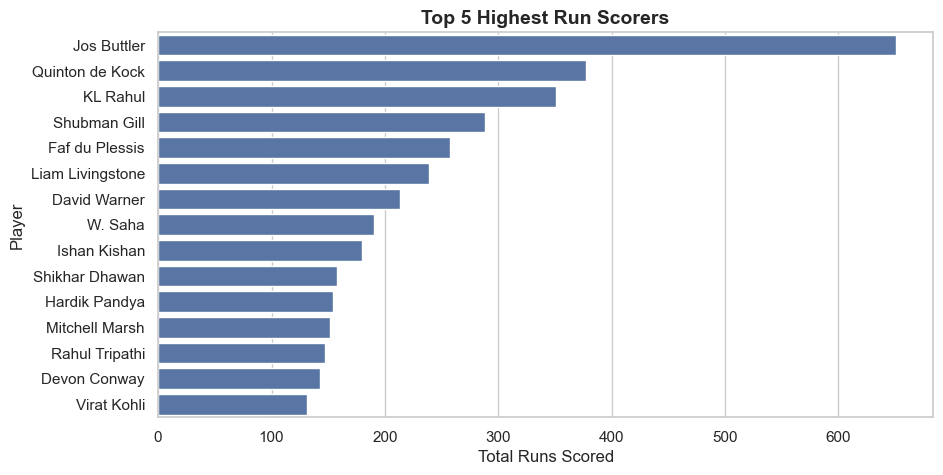

In [77]:
high = df.groupby('top_scorer')['highscore'].sum().sort_values(ascending=False)
top5_high = high.head(15)
top5_high

sns.barplot(x=top5_high.values, y=top5_high.index)
plt.title("Top 5 Highest Run Scorers")
plt.xlabel("Total Runs Scored")
plt.ylabel("Player")
plt.show()

## 🎯 Top 10 Bowlers by Total Wickets

This section analyzes bowlers with the highest cumulative wickets across matches.


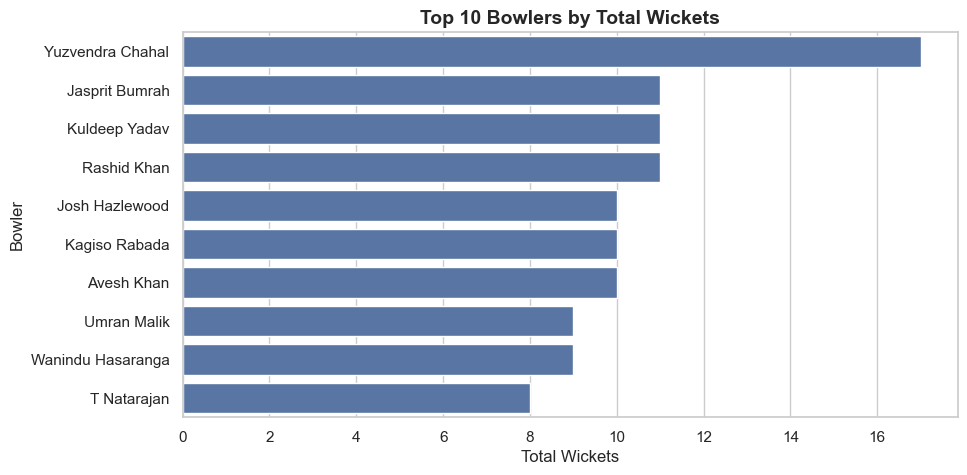

In [ ]:
df['wickets'] = (
    df['best_bowling_figure']
    .astype(str)
    .str.split('--')
    .str[0]
    .astype(int)
)
top_bowlers = (
    df.groupby('best_bowling')['wickets']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

top_bowlers
sns.barplot(
    x=top_bowlers.values,
    y=top_bowlers.index
)

plt.title("Top 10 Bowlers by Total Wickets")
plt.xlabel("Total Wickets")
plt.ylabel("Bowler")
plt.show()


## 📍 Venue Analysis
Stadiums hosting most matches.


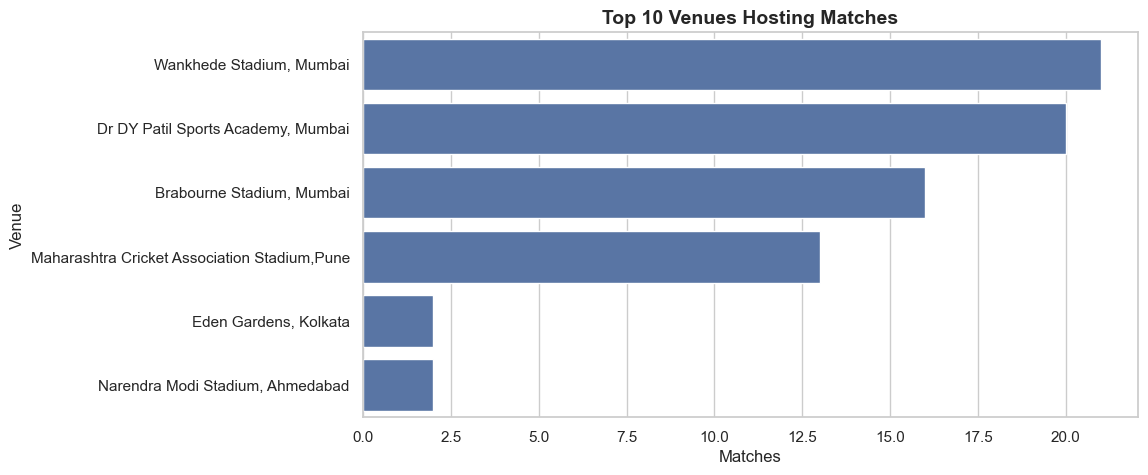

In [ ]:
top_venues = df['venue'].value_counts().head(10)
top_venues
sns.barplot(x=top_venues.values, y=top_venues.index)
plt.title("Top 10 Venues Hosting Matches")
plt.xlabel("Matches")
plt.ylabel("Venue")
plt.show()


## 📊 Win Margin Analysis
Distribution of wins by runs and wickets.


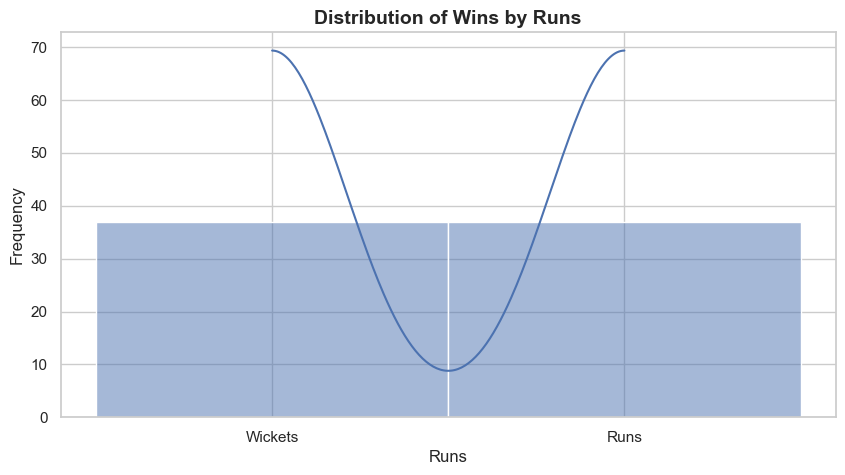

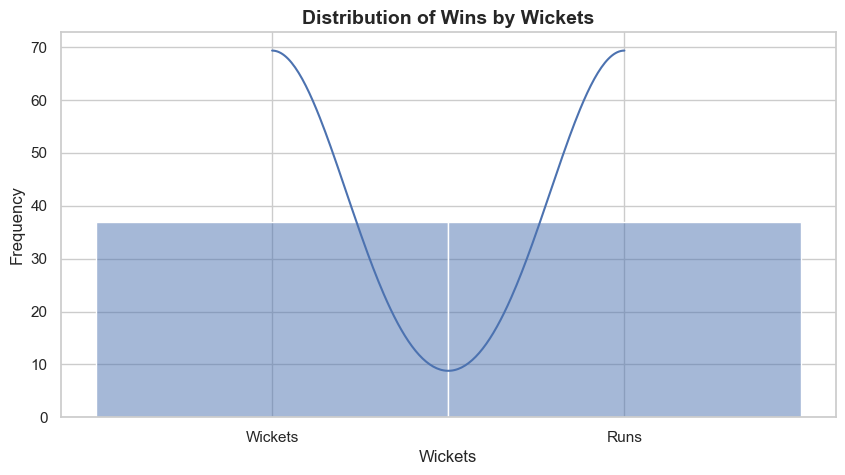

In [ ]:
sns.histplot(df['won_by'], bins=25, kde=True)
plt.title("Distribution of Wins by Runs")
plt.xlabel("Runs")
plt.ylabel("Frequency")
plt.show()

sns.histplot(df['won_by'], bins=10, kde=True)
plt.title("Distribution of Wins by Wickets")
plt.xlabel("Wickets")
plt.ylabel("Frequency")
plt.show()


## 🔥 Correlation Heatmap

Analyzing relationships between numerical variables.


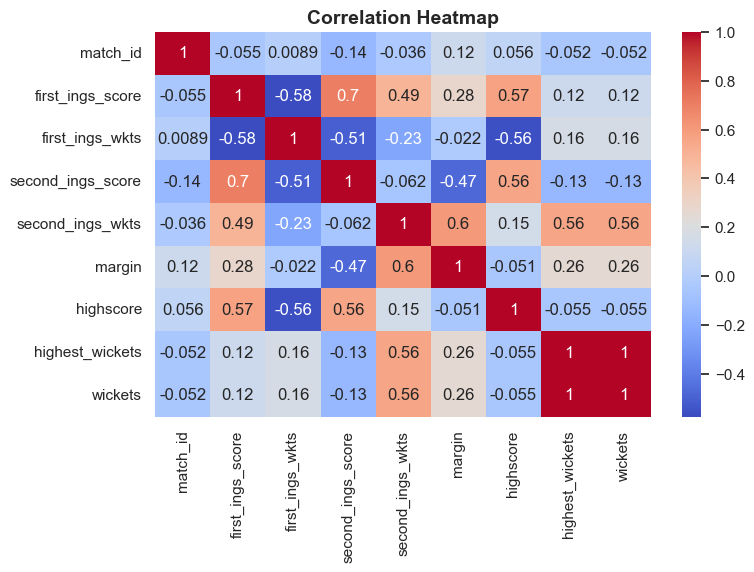

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


## 🔥 Key Insights

- Certain teams dominate IPL with consistently high win counts.
- Winning the toss has a measurable impact on match results.
- A few players stand out with multiple match-winning performances.
- Win margin analysis suggests strategic differences in defending and chasing.


## ✅ Conclusion

This IPL Data Analysis project highlights how data can reveal important performance patterns in sports analytics.

While toss plays a role, overall team strength and individual performance remain key factors in match outcomes.

The project demonstrates practical usage of:
- Data cleaning
- Exploratory Data Analysis (EDA)
- Visualization
- Insight generation


completed the analysis of IPL data, providing insights into team performance, player achievements, and match dynamics. This project serves as a foundation for further exploration and deeper analysis in the realm of sports analytics.


In [ ]:
print("IPL Data Analysis Completed Successfully ✅")


IPL Data Analysis Completed Successfully ✅
